### `Groupby` Function with CMAP Precipitation data

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path='/homes/jcampb8/data-shell/thesis/'
file='enso4_1979-2018.cmap.monthly.precip.mon.mean.nc'

In [3]:
ds=xr.open_dataset(path+file)

In [4]:
ds

<xarray.Dataset>
Dimensions:  (lat: 32, lon: 36, time: 480)
Coordinates:
  * lat      (lat) float32 68.75 66.25 63.75 61.25 ... -1.25 -3.75 -6.25 -8.75
  * lon      (lon) float32 211.25 213.75 216.25 218.75 ... 293.75 296.25 298.75
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (excludes NCEP Reana...
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    dataset_title:  CPC Merged Analysis of Precipitation
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    References:     https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    date_modified:  26 Feb 2019
    version:        V1912
    history:        update 12/2019 V1912
    data_modified:  2019-12-12

#### Use `reindex` to reverse the latitudes

In [5]:
ds=ds.reindex(lat=list(reversed(ds['lat'])))

#### Use `groupby` to get precipitation averages by seasons

In [7]:
ds_seas=ds.groupby('time.season').mean()
ds_seas

<xarray.Dataset>
Dimensions:  (lat: 32, lon: 36, season: 4)
Coordinates:
  * lat      (lat) float64 -8.75 -6.25 -3.75 -1.25 ... 61.25 63.75 66.25 68.75
  * lon      (lon) float32 211.25 213.75 216.25 218.75 ... 293.75 296.25 298.75
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    precip   (season, lat, lon) float32 3.7457683 2.953646 ... 0.10032552

Text(0.5, 1.0, 'DJF Seasonal Mean Precipitation (mm/day)')

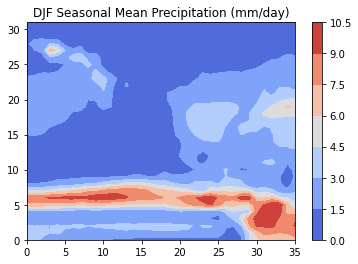

In [8]:
plt.contourf(ds_seas['precip'].sel(season='MAM'),cmap='coolwarm')
plt.colorbar()
plt.title('DJF Seasonal Mean Precipitation (mm/day)')

#### Use `groupby` to get precipitation standard deviation by seasons

In [9]:
ds_seas_std=ds.groupby('time.season').std()
ds_seas_std

<xarray.Dataset>
Dimensions:  (lat: 32, lon: 36, season: 4)
Coordinates:
  * lat      (lat) float64 -8.75 -6.25 -3.75 -1.25 ... 61.25 63.75 66.25 68.75
  * lon      (lon) float32 211.25 213.75 216.25 218.75 ... 293.75 296.25 298.75
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    precip   (season, lat, lon) float32 3.8013916 3.2213311 ... 0.1213748

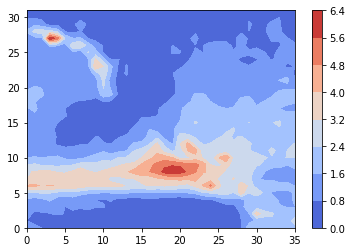

In [10]:
plt.contourf(ds_seas_std['precip'].sel(season='SON'),cmap='coolwarm')
plt.colorbar()

#### Use `groupby` to get precipitation variance by seasons

In [11]:
ds_seas_var=ds.groupby('time.season').var()
ds_seas_var

<xarray.Dataset>
Dimensions:  (lat: 32, lon: 36, season: 4)
Coordinates:
  * lat      (lat) float64 -8.75 -6.25 -3.75 -1.25 ... 61.25 63.75 66.25 68.75
  * lon      (lon) float32 211.25 213.75 216.25 218.75 ... 293.75 296.25 298.75
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    precip   (season, lat, lon) float32 14.450578 10.376974 ... 0.014731843

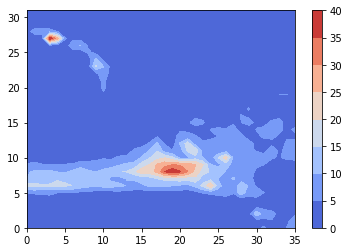

In [12]:
plt.contourf(ds_seas_var['precip'].sel(season='SON'),cmap='coolwarm')
plt.colorbar()

#### Use `groupby` to get precipitation averages by month

In [13]:
ds_month=ds.groupby('time.month').mean()

In [14]:
ds_month

<xarray.Dataset>
Dimensions:  (lat: 32, lon: 36, month: 12)
Coordinates:
  * lat      (lat) float64 -8.75 -6.25 -3.75 -1.25 ... 61.25 63.75 66.25 68.75
  * lon      (lon) float32 211.25 213.75 216.25 218.75 ... 293.75 296.25 298.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    precip   (month, lat, lon) float32 4.0820312 3.2375 ... 0.21660157